<font size=6> Исследование данных о российском кинопрокате </font>

Заказчик исследования — Министерство культуры Российской Федерации.  
Необходимо изучить рынок российского кинопроката и выявить текущие тренды. Уделить внимание фильмам, которые получили государственную поддержку. Ответить на вопрос, насколько такие фильмы интересны зрителю. Данные опубликованны на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

**План исследования:**
1. Получение и изучени данных;
2. Предобработка данных;
3. Исследовательский анализ данных;
4. Выводы.

**Описание данных**
Таблица "mkrf_movies" содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.
- `title` — название фильма;
- `puNumber` — номер прокатного удостоверения;
- `show_start_date` — дата премьеры фильма;
- `type` — тип фильма;
- `film_studio` — студия-производитель;
- `production_country` — страна-производитель;
- `director` — режиссёр;
- `producer` — продюсер;
- `age_restriction` — возрастная категория;
- `refundable_support` — объём возвратных средств государственной поддержки;
- `nonrefundable_support` — объём невозвратных средств государственной поддержки;
- `financing_source` — источник государственного финансирования;
- `budget` — общий бюджет фильма;
- `ratings` — рейтинг фильма на КиноПоиске;
- `genres` — жанр фильма.
Столбец budget уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.

Таблица "mkrf_shows" содержит сведения о показах фильмов в российских кинотеатрах.
- `puNumber` — номер прокатного удостоверения;
- `box_office` — сборы в рублях.

## Изучение данных файлов. 

Импортиреум необходимые библиотеки.

In [1]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
try:
    from tqdm import tqdm
except:
    !pip install tqdm
    from tqdm import tqdm

In [3]:
# читаем файлы указанные в задании.
try:
    df1 = pd.read_csv('mkrf_movies.csv')
    df2 = pd.read_csv('mkrf_shows.csv')
except FileNotFoundError as e:
    print(e)
    df1 = pd.read_csv('***/mkrf_movies.csv')
    df2 = pd.read_csv('***/mkrf_shows.csv')

In [4]:
# настройки оотображения таблиц, форматов чисел и предупреждений Python
pd.set_option('display.float_format', '{:,.2f}'.format)
pd.set_option('display.max.columns', None)
pd.set_option('mode.chained_assignment', None)

общие данные по полученным df

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

**Описание данных.** <div/>
<span> Таблица mkrf_movies содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.</span>
- title — название фильма;
- puNumber — номер прокатного удостоверения;
- show_start_date — дата премьеры фильма;
- type — тип фильма;
- film_studio — студия-производитель;
- production_country — страна-производитель;
- director — режиссёр;
- producer — продюсер;
- age_restriction — возрастная категория;
- refundable_support — объём возвратных средств государственной поддержки;
- nonrefundable_support — объём невозвратных средств государственной поддержки;
- financing_source — источник государственного финансирования;
- budget — общий бюджет фильма;
- ratings — рейтинг фильма на КиноПоиске;
- genres — жанр фильма.

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Таблица mkrf_shows содержит сведения о показах фильмов в российских кинотеатрах.
<div>puNumber — номер прокатного удостоверения;
<div>box_office — сборы в рублях.

**Описание данных.** <div/>
<span> Таблица mkrf_shows содержит сведения о показах фильмов в российских кинотеатрах.</span>
- puNumber — номер прокатного удостоверения;
- box_office — сборы в рублях.

Необходимо выполнить слияние двух df по столбцу 'puNumber', но столбцы с этими данными имеюр разных формат в df1 и df2. Будем приводить данные к единому формату, а именно, df1 к целочисленному формату.

In [7]:
# пробуем
try: df1['puNumber'] = df1['puNumber'].astype('int')
except: print ('ERROR')    

ERROR


Выделим строки с проблемными данными. 
<div> Через функцию, для таких строк, в новом столбце 'pu_cat', укажем 0, для корректных данных 1.

In [8]:
def dig(x):
    return 1 if x.isdigit() else 0

In [9]:
df1['pu_cat'] = df1['puNumber'].apply(dig)

Посмотрим на эти строки

In [10]:
df1.query('pu_cat == 0')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,pu_cat
804,Паранормальный Якутск,111004112,2012-08-24T12:00:00.000Z,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,0
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,0


In [11]:
# посмотрим на значение в 804 строке
df1.loc[804, 'puNumber']

' 111004112'

In [12]:
# удалим пробелы
df1.loc[804, 'puNumber'] = df1.loc[804, 'puNumber'].replace(' ', '')

In [13]:
# значение в 1797 меняем на 0
df1.loc[1797, 'puNumber'] = 0

In [14]:
# меняем тип данных
df1['puNumber'] = df1['puNumber'].astype('int')
# удаляем вспомогательный столбец
df1.drop('pu_cat', axis=1, inplace=True)
df1.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [15]:
# выполним слияние
df = df1.merge(df2, how='left', on='puNumber')
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [16]:
# общие сведения по новому df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int32  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [17]:
# Оценим долю пропусков от общего числа записей.
pd.DataFrame((df.isna().mean()*100)).style.format('{:.2f}').background_gradient('coolwarm')

,0
title,0.00
puNumber,0.00
show_start_date,0.00
type,0.00
film_studio,0.24
production_country,0.03
director,0.12
producer,7.59
age_restriction,0.00
refundable_support,95.57


**Вывод.**
<div> Получена таблица для последующей обработки. В таблицу 16 колонок, в 11 из них есть пропуски. Четыре колонки с 95.57% пропусков актуальны только для группы фильмов с государственной поддержкой. В целях исследования, наиболее критичными являются пропуски в колонке с данными о сборах. 

## Предобработка данных

### Изменение типов данных

На текущем шаге можем поменять тип данных для столбца с рейтингом. Проверим возможность замены.

In [18]:
try: df['ratings'] = df['ratings'].astype('float')
except: print ('ERROR')

ERROR


Сгенерируем список, который вызывает ошибку.

In [19]:
t1 = []
t2 = {}
for i in df['ratings'].unique():
    try: 
        t2[i] = float(i)
    except: 
        t1.append(i)
print (t1 )       

['99%', '28%', '97%', '83%', '64%', '91%', '94%', '62%', '79%', '90%', '19%', '88%', '89%', '98%']


Уберём "%" и разделим на 10, что бы привести к единому виду.

In [20]:
for i in t1:
    t2[i] = float(i.replace('%', ''))/10    

In [21]:
# произведём замену используя полученный словарь
df['ratings'] = df['ratings'].replace(t2)
# проверка
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int32  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   float64
 14  genres                 6510 non-null   object 
 15  box_

### Обработка пропусков

Возможно, данные 'genres' могут быть получены из данных 'type', в столбце с которыми отсутствуют пропуски. Посмотрим на сожержание 'type' 

In [22]:
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

Удалим дубли с пробелами.

In [23]:
df['type'] = df['type'].str.strip()
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

Посмотрим на наиболее часто встречающиеся жанры для каждого из 8 типов фильмов. Так же отобразим число пропусков для каждой из групп.

In [24]:
for i in df['type'].unique():
    print ('Жанры для фильма типа:', i, 'и их частота:')
    print (df.loc[df['type'] == i]['genres'].value_counts().head())
    print ('Пропусков в группе', i, 'по столбцу genres', df.loc[(df['type'] == i) & df['genres'].isna()]['type'].count())
    print ('*'*50)

Жанры для фильма типа: Художественный и их частота:
драма                      452
комедия                    337
мелодрама,комедия          218
драма,мелодрама,комедия    185
драма,мелодрама            173
Name: genres, dtype: int64
Пропусков в группе Художественный по столбцу genres 376
**************************************************
Жанры для фильма типа: Анимационный и их частота:
мультфильм,комедия,приключения     67
мультфильм,фэнтези,комедия         56
мультфильм,детский                 34
мультфильм,приключения,семейный    30
мультфильм                         22
Name: genres, dtype: int64
Пропусков в группе Анимационный по столбцу genres 258
**************************************************
Жанры для фильма типа: Прочие и их частота:
документальный              43
документальный,биография    15
документальный,музыка       12
концерт,музыка               9
драма                        8
Name: genres, dtype: int64
Пропусков в группе Прочие по столбцу genres 198
*************

В 4-х из 5 групп с пропусками можно произвести замену на наиболее часто встречающийся жанр. Сделаем это через словарь. В группе "Художественный" нет явно выраженного основного жанра, три основных жанра встречаются почти с одинаковой частотой, а так же имеют группировки. Жанры для этой группы, на данном этапе, не определяем.

In [25]:
new_genres = {'Анимационный': 'мультфильм', 
              'Прочие': 'документальный',
              'Документальный': 'документальный', 
              'Научно-популярный':'документальный'}

In [26]:
def gen_creation(row):
    return new_genres.get(row['type']) if row['genres'] != row['genres'] else row['genres']

In [27]:
df['genres'] = df.apply(gen_creation, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int32  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   float64
 14  genres                 7110 non-null   object 
 15  box_

In [28]:
# посмотрим на остаток
for i in df['type'].unique():
    print ('Пропусков в группе', i, 'по столбцу genres', df.loc[(df['type'] == i) & df['genres'].isna()]['type'].count())

Пропусков в группе Художественный по столбцу genres 376
Пропусков в группе Анимационный по столбцу genres 0
Пропусков в группе Прочие по столбцу genres 0
Пропусков в группе Документальный по столбцу genres 0
Пропусков в группе Научно-популярный по столбцу genres 0
Пропусков в группе Музыкально-развлекательный по столбцу genres 0


### Заполнение пропусков данными из внешних источников

Согласно описания проекта, работаем с данными, опубликованными на портале открытых данных Министерства культуры. Анализ указанного источника показал, что можно использовать дополнительные данные - "Сведения о показах фильмов в кинозалах"
(https://opendata.mkrf.ru/opendata/7705851331-movie_gross). Добавим эти данные в работу.

In [29]:
try:
    df5 = pd.read_csv('data-5-structure-1.csv')
except:    
    df5 = pd.read_csv('https://opendata.mkrf.ru/opendata/7705851331-movie_gross/data-5-structure-1.csv')
df5.head()

,Название,№ ПУ,"Сборы, руб.",Тип,Возрастное ограничение
0,Холоп,111021719,"3,073,568,690.79",художественный,«12+» для детей старше 12 лет
1,Король Лев,124004919 / 124002720,"2,635,292,045.64",анимационный,«6+» для детей старше 6 лет
2,Мстители: Финал,121005519,"2,576,613,776.83",художественный,«16+» для детей старше 16 лет
3,Т-34,111024918,"2,271,754,004.52",художественный,«12+» для детей старше 12 лет
4,Малефисента: Владычица тьмы,121026219,"1,911,944,865.95",художественный,«6+» для детей старше 6 лет


In [30]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Название                626 non-null    object 
 1   № ПУ                    615 non-null    object 
 2   Сборы, руб.             626 non-null    float64
 3   Тип                     626 non-null    object 
 4   Возрастное ограничение  626 non-null    object 
dtypes: float64(1), object(4)
memory usage: 24.6+ KB


Из этих данных нам нужен столбец с суммой сборов. Подготовим данные для слияния с df по столбцу с номером ПУ.

In [31]:
# переименуем столбцы и удалим пропуски.
df5.rename(columns={'Название': 'title2', 
                    '№ ПУ': 'puNumber2', 
                    'Сборы, руб.':'box_office2', 
                    'Тип': 'type2', 
                    'Возрастное ограничение': 'age_restriction2'}, inplace=True)
df5 = df5.dropna()
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 615 entries, 0 to 625
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title2            615 non-null    object 
 1   puNumber2         615 non-null    object 
 2   box_office2       615 non-null    float64
 3   type2             615 non-null    object 
 4   age_restriction2  615 non-null    object 
dtypes: float64(1), object(4)
memory usage: 28.8+ KB


Видим, что для одной записи, в графе с номером ПУ может быть указан не один номер. Добавим столбец с длинной переменной в столбце 'puNumber2'.

In [32]:
df5['pn_len'] = df5['puNumber2'].apply(len)
df5.head()

,title2,puNumber2,box_office2,type2,age_restriction2,pn_len
0,Холоп,111021719,"3,073,568,690.79",художественный,«12+» для детей старше 12 лет,9
1,Король Лев,124004919 / 124002720,"2,635,292,045.64",анимационный,«6+» для детей старше 6 лет,21
2,Мстители: Финал,121005519,"2,576,613,776.83",художественный,«16+» для детей старше 16 лет,9
3,Т-34,111024918,"2,271,754,004.52",художественный,«12+» для детей старше 12 лет,9
4,Малефисента: Владычица тьмы,121026219,"1,911,944,865.95",художественный,«6+» для детей старше 6 лет,9


In [33]:
# максимум
df5['pn_len'].max()

93

In [34]:
# посмотрим на эту запись
df5.loc[df5['pn_len'] == 93]

,title2,puNumber2,box_office2,type2,age_restriction2,pn_len
84,Щенячий патруль (8 выпусков),124001919 / 124002719 / 124004019 / 124005119 ...,"116,137,094.72",анимационный,«0+» для любой зрительской аудитории,93


In [35]:
df5.loc[84, 'puNumber2']

'124001919 / 124002719 / 124004019 / 124005119 / 124006519 / 124008219 / 124008919 / 124010119'

Разнесём номера ПУ, если их в столбце больше 1, по отдельным столбцам.

In [36]:
# определим число столбцов
col_no = len(df5.loc[84, 'puNumber2'].split('/'))
col_no

8

In [37]:
# посмотрим группировку по длине puNumber2 
df5['pn_len'].value_counts()

9     603
21      8
45      2
57      1
93      1
Name: pn_len, dtype: int64

In [38]:
# функция для обработки строки.
def puNo_split (row):
    # создаем массив из номеров ПУ
    pu_list = row['puNumber2'].split('/')
    # перебираем элементы массива и сохраняем каждый элемент в свой столбец
    for i in range(len(pu_list)):
        cl = ['puN']
        cl.append(str(i))
        col_name = ''.join(cl)
        row[col_name] =  pu_list[i]
    return row       

In [39]:
# Применяем функцию строки к df5
# Для визуализации процесса обработки используем tqdm
tqdm.pandas()
df5 = df5.progress_apply(puNo_split, axis=1)

100%|███████████████████████████████████████| 615/615 [00:02<00:00, 294.52it/s]


In [40]:
# проверка
df5.head()

,age_restriction2,box_office2,pn_len,puN0,puN1,puN2,puN3,puN4,puN5,puN6,puN7,puNumber2,title2,type2
0,«12+» для детей старше 12 лет,"3,073,568,690.79",9,111021719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111021719,Холоп,художественный
1,«6+» для детей старше 6 лет,"2,635,292,045.64",21,124004919,124002720,NaN,NaN,NaN,NaN,NaN,NaN,124004919 / 124002720,Король Лев,анимационный
2,«16+» для детей старше 16 лет,"2,576,613,776.83",9,121005519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121005519,Мстители: Финал,художественный
3,«12+» для детей старше 12 лет,"2,271,754,004.52",9,111024918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111024918,Т-34,художественный
4,«6+» для детей старше 6 лет,"1,911,944,865.95",9,121026219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121026219,Малефисента: Владычица тьмы,художественный


In [41]:
# оставим только столбцы необходимые для дальнейшей обработки
df5 = df5.loc[:, ['box_office2', 'puN0', 'puN1', 'puN2', 'puN3', 'puN4', 'puN5', 'puN6', 'puN7']]
df5.head()

,box_office2,puN0,puN1,puN2,puN3,puN4,puN5,puN6,puN7
0,"3,073,568,690.79",111021719,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"2,635,292,045.64",124004919,124002720,NaN,NaN,NaN,NaN,NaN,NaN
2,"2,576,613,776.83",121005519,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"2,271,754,004.52",111024918,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"1,911,944,865.95",121026219,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Из имеющейся таблицы нужно получить таблицу с 2 столбцами, 'box_office2' и 'puN'. Приведем df5 к такому виду.

In [42]:
df6 = df5.loc[:, ['box_office2', 'puN0']]
df6.rename(columns={'puN0': 'puN'}, inplace=True)
for i in range(1, 8):
    col_names_list = ['box_office2']
    curr_col = ''.join(['puN', str(i)])
    col_names_list.append(curr_col)
    dft = df5.loc[:, col_names_list]
    dft.rename(columns={ curr_col : 'puN' }, inplace=True)
    dft = dft.dropna()
    df6 = pd.merge(df6, dft, how='outer')
# проверка    
df6.tail()

,box_office2,puN
635,"116,137,094.72",124006519
636,"1,156,482.00",111021018
637,"116,137,094.72",124008219
638,"116,137,094.72",124008919
639,"116,137,094.72",124010119


In [43]:
# переименуем столбец для слияния
df6.rename(columns={'puN': 'puNumber'}, inplace=True)
df6.head()

,box_office2,puNumber
0,"3,073,568,690.79",111021719
1,"2,635,292,045.64",124004919
2,"2,576,613,776.83",121005519
3,"2,271,754,004.52",111024918
4,"1,911,944,865.95",121026219


In [44]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640 entries, 0 to 639
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   box_office2  640 non-null    float64
 1   puNumber     640 non-null    object 
dtypes: float64(1), object(1)
memory usage: 15.0+ KB


In [45]:
# меняем тип данных
df6['puNumber'] = df6['puNumber'].astype('int')

In [46]:
# выполним слияние
df = pd.merge(df, df6, how='left', on='puNumber')

In [47]:
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,box_office2
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN,NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN,NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,NaN


Посмотрим, сколько дополнительных данных было получено.

In [48]:
df.loc[df['box_office'].isna() & (df['box_office2'].isna() == False)]['box_office2'].count()

32

Получены данные по 32 фильмам. Столбец с номерами ПУ нам больше не понадобится, удалим его.

In [49]:
df = df.drop('puNumber', axis=1)

Проверим дубликаты.

In [50]:
df.loc[df.duplicated()]

,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,box_office2
1301,Эпидемия_,2013-10-07T12:00:00.000Z,Художественный,"Морена Фильм, Ребелион Террестр, А 3 Медиа Гру...",Испания - Франция,"Алекс Пастор, Давид Пастор","Мерседес Гамеро, Альберто Марини, Педро Уриоль",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.20,"драма,фантастика,триллер",NaN,NaN
1476,Оторвы,2014-04-07T12:00:00.000Z,Художественный,"Проминент Пикчерз, Ворлдвью Интертейнмент, Инд...",США,Кристофер Нельсон,"Молли Коннерс, Хезер Рэй",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,3.50,"комедия,приключения",NaN,NaN
4043,Бугай,2010-09-24T12:00:00.000Z,Анимационный,"Иллюзион Студиос, Процесо",Мексика-Аргентина,Густаво Кова,"Хуго Е. Лаура, Хосе Луис Масса",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.60,"мультфильм,боевик,триллер",NaN,NaN
6380,Ян Антонышев,2018-11-15T12:00:00.000Z,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,документальный,NaN,NaN
6429,Зоя,2018-11-25T12:00:00.000Z,Художественный,Тарханова Юлия Олеговна,Россия,О.Товма,Ю.Тарханова,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,3.90,"история,биография,военный",NaN,NaN


In [51]:
# удалим дибликаты
df = df.drop_duplicates().reset_index(drop = True)
# проверка
df.loc[df.duplicated()]

,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,box_office2


Полученные значения для 32 фильмов перенесём из столбца 'box_office2' в 'box_office'

In [52]:
# список индоксов таких строк
ind_for_copy = df.loc[df['box_office'].isna() & (df['box_office2'].isna() == False)].index

In [53]:
# обработаем каждую строку
for i in ind_for_copy:
    df.loc[i, 'box_office'] = df.loc[i, 'box_office2']
# проверка    
df.loc[df['box_office'].isna() & (df['box_office2'].isna() == False)]    

,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,box_office2


In [54]:
# удалим временный столбец 'box_office2'
df = df.drop('box_office2', axis=1)

Согласно описания, данные в столбце 'budget' указаны только для тех фильмов, которые получили государственную поддержку. Проверим данные, а именно, посмотрим записи для которых размер гос.поддержки больше бюджета.

In [55]:
df.loc[df['budget'] < (df['refundable_support'] + df['nonrefundable_support'])]

,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2051,14+,2014-12-19T12:00:00.000Z,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00",0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10"
2056,Дуxless 2,2015-01-26T12:00:00.000Z,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"75,000,000.00",0.00,Фонд кино,6.60,драма,"446,163,511.00"
2470,Воин (2015),2015-09-28T12:00:00.000Z,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00",0.00,Фонд кино,7.80,"боевик,драма,криминал","196,572,438.40"
2530,Бармен.,2015-05-26T12:00:00.000Z,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.00",0.00,0.00,Фонд кино,6.20,"комедия,фэнтези","67,418,974.80"
2613,Савва. Сердце воина,2015-07-21T12:00:00.000Z,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00",0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,551.40"
2682,Тряпичный союз,2015-06-08T12:00:00.000Z,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,"59,000,000.00",0.00,Фонд кино,6.30,"комедия,драма","1,957,738.51"
2786,Срочно выйду замуж,2015-09-30T12:00:00.000Z,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"35,000,000.00",0.00,Фонд кино,5.10,"комедия,мелодрама","72,937,783.20"
2872,Помню - не помню!,2016-03-01T12:00:00.000Z,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,"6,000,000.00",0.00,Министерство культуры,4.30,комедия,"15,362,931.43"
3045,Любовь с ограничениями,2016-04-29T12:00:00.000Z,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.00","51,000,000.00",0.00,Фонд кино,6.30,"комедия,мелодрама","70,299,052.00"
3563,Притяжение (2016),2016-12-16T12:00:00.000Z,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,"250,000,000.00",0.00,Фонд кино,5.60,фантастика,"1,038,321,489.00"


In [56]:
df.loc[df['budget'] < (df['refundable_support'] + df['nonrefundable_support'])]['budget'].count()

17

Записей, для которых не раскрыта информация о полном бюджете - 17.

### Добавление столбцов

Создадим столбец с информацией о годе проката. Год возьмем из даты премьеры фильма.

In [57]:
df['date'] = pd.to_datetime(df['show_start_date'], format='%Y.%m.%dT%H:%M:%S')
df['year'] = df['date'].dt.year
df.head(10)

,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,date,year
0,Открытый простор,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN,2015-11-27 12:00:00+00:00,2015
1,Особо важное задание,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN,2016-09-13 12:00:00+00:00,2016
2,Особо опасен,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2016-10-10 12:00:00+00:00,2016
3,Особо опасен,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2016-06-10 12:00:00+00:00,2016
4,Особо опасен,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2015-07-29 12:00:00+00:00,2015
5,Остановился поезд,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.70,драма,NaN,2016-09-13 12:00:00+00:00,2016
6,Любовь и голуби,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.30,"мелодрама,комедия","2,700.00",2013-10-18 12:00:00+00:00,2013
7,Любовь и сигареты,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.60,"мюзикл,мелодрама,комедия",NaN,2014-12-29 12:00:00+00:00,2014
8,Отпетые мошенники.,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.00,"комедия,криминал",NaN,2016-05-05 12:00:00+00:00,2016
9,Отпуск за свой счет,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.80,"мелодрама,комедия",NaN,2014-12-01 12:00:00+00:00,2014


Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно. Для этого используем функцию.

In [58]:
def short_data(full_name):
    try:
        short_name = full_name.split(',')[0]
    except:  
        short_name = np.NaN
    return short_name

In [59]:
df['dir_short'] = df['director'].apply(short_data)
df['gen_short'] = df['genres'].apply(short_data)
df.head()

,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,date,year,dir_short,gen_short
0,Открытый простор,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN,2015-11-27 12:00:00+00:00,2015,Кевин Костнер,боевик
1,Особо важное задание,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN,2016-09-13 12:00:00+00:00,2016,Е.Матвеев,драма
2,Особо опасен,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2016-10-10 12:00:00+00:00,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2016-06-10 12:00:00+00:00,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2015-07-29 12:00:00+00:00,2015,Тимур Бекмамбетов,фантастика


Выделим фильмы с государственной поддержкой. Создадим столбец 'gov_support_ind', где для фильмов с поддержкой укажем 1, а без поддержки - 0. Так же добавим столбец 'gov_support_rate', где посчитаем долю госюподдержки в общем бюджете (если он указан) фильма.

In [60]:
def gov_support(row):
    # если бюджет "пропуск"
    if row['budget'] != row['budget']: 
        row['gov_support_rate'] = np.NaN
        row['gov_support_ind'] = 0
    # если бюджет 0    
    elif row['budget'] == 0:
        row['gov_support_rate'] = np.NaN
        row['gov_support_ind'] = 1
    # если бюджет не ноль и не пропуск
    else:
        row['gov_support_rate'] = (row['refundable_support'] + row['nonrefundable_support']) / row['budget'] * 100
        row['gov_support_ind'] = 1
    return row

In [61]:
# применим функцию к df, добавив визуализацию процесса.
tqdm.pandas()
df = df.progress_apply(gov_support, axis=1)
# посмотрим описание нового столбца
df['gov_support_rate'].describe()

100%|█████████████████████████████████████| 7481/7481 [00:26<00:00, 281.43it/s]


count   315.00
mean     51.74
std      17.00
min       4.40
25%      37.35
50%      59.23
75%      65.69
max      78.47
Name: gov_support_rate, dtype: float64

In [62]:
# проверка
df.loc[df['budget'].isna() & (df['gov_support_ind'] == 1)]

,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,date,year,dir_short,gen_short,gov_support_rate,gov_support_ind


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7481 entries, 0 to 7480
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7481 non-null   object             
 1   show_start_date        7481 non-null   object             
 2   type                   7481 non-null   object             
 3   film_studio            7464 non-null   object             
 4   production_country     7479 non-null   object             
 5   director               7472 non-null   object             
 6   producer               6913 non-null   object             
 7   age_restriction        7481 non-null   object             
 8   refundable_support     332 non-null    float64            
 9   nonrefundable_support  332 non-null    float64            
 10  budget                 332 non-null    float64            
 11  financing_source       332 non-null    object           

**Вывод.**
<div> Произведено изменение типов данных, исправлены некорректные данные, удалены дубликаты, добавлены пропущенные значения по некоторым столбцам, добавлены новые столбцы и получены дополнительные данные из внешнего источника. Пропуски по некоторым столбцам, в виду невозможности однозначного определения, оставлены без изменений.

## Исследовательский анализ данных


### Распределение по годам


Посмотрим, сколько фильмов выходило в прокат каждый год.

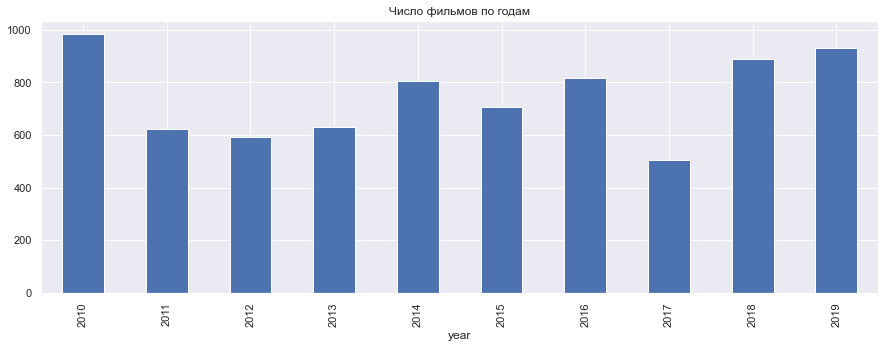

In [64]:
# установим размер графиков
sns.set(rc={'figure.figsize':(15,5)})
df.groupby('year')['year'].count().plot(kind='bar', grid=True, title='Число фильмов по годам')
plt.show()

Посмотрим на сумму сборов по годам. Будем помнить, что такая информация представлена не для всех фильмов.

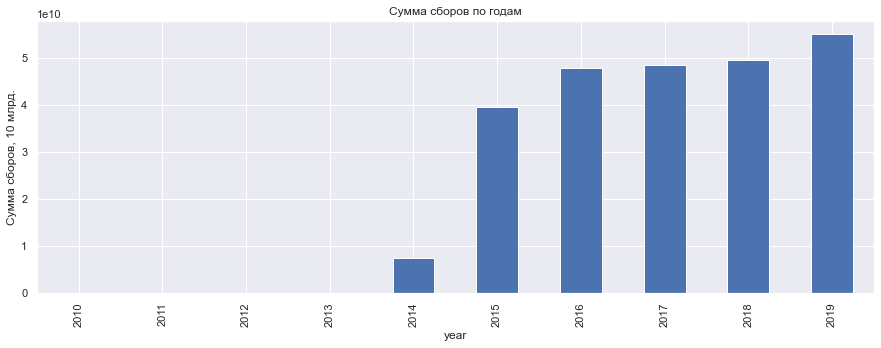

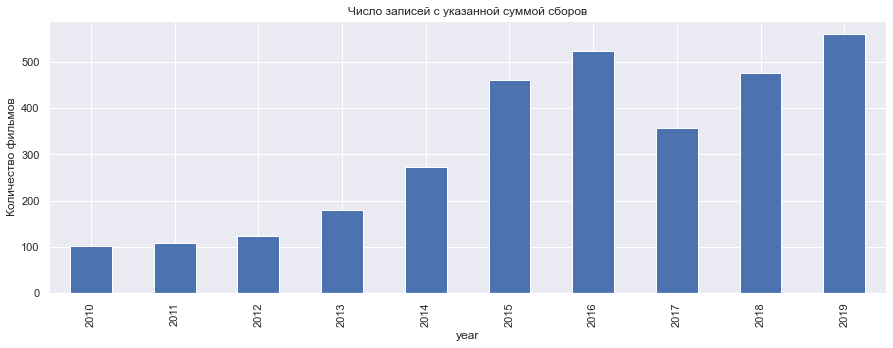

In [65]:
df.groupby('year')['box_office'].sum()\
    .plot(kind='bar', grid=True, title='Сумма сборов по годам', ylabel='Сумма сборов, 10 млрд.')
plt.show()
df.loc[(df['box_office'] != 0) & (df['box_office'].isna() == False)].groupby('year')['box_office'].count()\
    .plot(kind='bar', grid=True, title='Число записей с указанной суммой сборов', ylabel='Количество фильмов')
plt.show()

Посмотрим среднюю и медианную сумму сборов для каждого года.

In [66]:
df.loc[(df['box_office'] != 0) & (df['box_office'].isna() == False)]\
  .pivot_table(index='year', values = ['box_office'], aggfunc = ['count', 'mean', 'median', 'sum', 'min', 'max', 'std' ])\
  .applymap("{0:,.0f}".format)

,count,mean,median,sum,min,max,std
,box_office,box_office,box_office,box_office,box_office,box_office,box_office
year,,,,,,,
2010,101,"24,046","1,710","2,428,654",75,"1,446,400","146,139"
2011,109,"129,383","3,000","14,102,765",125,"11,618,085","1,114,447"
2012,123,"56,548","6,220","6,955,423",80,"2,311,220","233,667"
2013,179,"166,479","3,580","29,799,706",40,"19,957,032","1,525,590"
2014,273,"27,270,886","20,400","7,444,951,859",50,"1,016,410,635","122,324,727"
2015,462,"85,492,132","5,003,450","39,497,365,196",100,"1,658,861,426","220,771,366"
2016,525,"91,173,904","3,915,041","47,866,299,742",200,"2,048,126,108","251,252,221"
2017,357,"136,032,793","9,968,340","48,563,707,218","7,900","2,779,686,144","323,251,441"


Представлены данные с 2010 по 2019гг. Максимальная сумма сборов в 2019. В 2016-2018 сборы примерно одинаковые, но существенно разлечается число фильмов. Т.е. сборы в расчете на 1 фильм в 2017-2018гг были выше об этом же свидетельствуют медианные значения.

### Влияние возрастного ограничения

Определим влияние возрастного ограничения аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год. 

In [67]:
df.loc[(df['box_office'] != 0) & (df['box_office'].isna() == False) & (df['year'] > 2014)]\
  .pivot_table(index='year', columns=['age_restriction'], values = ['box_office'], aggfunc = ['sum'])\
  .applymap("{0:,.0f}".format)


sum  \
                                            box_office   
age_restriction «0+» - для любой зрительской аудитории   
year                                                     
2015                                       379,054,578   
2016                                       150,228,849   
2017                                       229,598,930   
2018                                        32,449,002   
2019                                       952,055,361   

                                                 \
                                                  
age_restriction «12+» - для детей старше 12 лет   
year                                              
2015                             13,616,082,009   
2016                             12,204,446,524   
2017                              7,851,427,661   
2018                             14,267,291,661   
2019                             12,685,788,984   

                                                                             \
                                                                              
age_restriction «16+» - для детей старше 16 лет «18+» - запрещено для детей   
year                                                                          
2015                             11,368,120,870               5,432,308,367   
2016                             16,664,548,542               6,793,929,819   
2017                             18,745,042,900               9,651,495,581   
2018                             16,512,512,823               8,760,085,501   
2019                             14,389,297,792              10,423,127,149   

                                               
                                               
age_restriction «6+» - для детей старше 6 лет  
year                                           
2015                            8,701,799,371  
2016                           12,053,146,008  
2017                           12,086,142,146  
2018                           10,104,974,623  
2019                           16,704,476,582

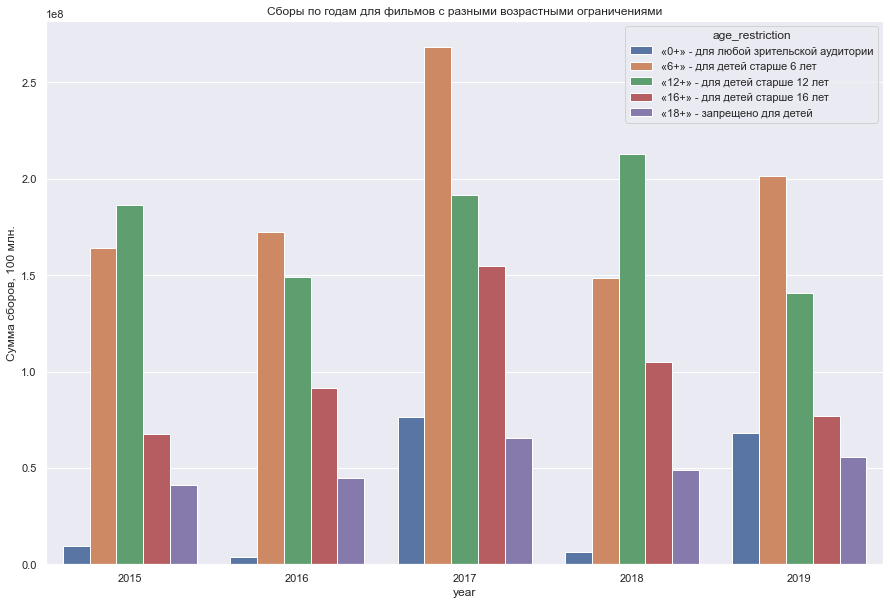

In [68]:
h_order = ['«0+» - для любой зрительской аудитории',
         '«6+» - для детей старше 6 лет',
         '«12+» - для детей старше 12 лет',
         '«16+» - для детей старше 16 лет',
         '«18+» - запрещено для детей']
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x="year", y="box_office", data=df.query('year > 2014'), ci=None, hue='age_restriction', hue_order = h_order)\
    .set(title='Сборы по годам для фильмов с разными возрастными ограничениями', ylabel='Сумма сборов, 100 млн.')
plt.show()

Видим, что больше всего денег в прокате собирают фильмы категорий 6+ и 12+. Причина- семейный поход с детьми или самостоятальный поход детей среднего школьного возраста. Посмотрим по типу фильмов.

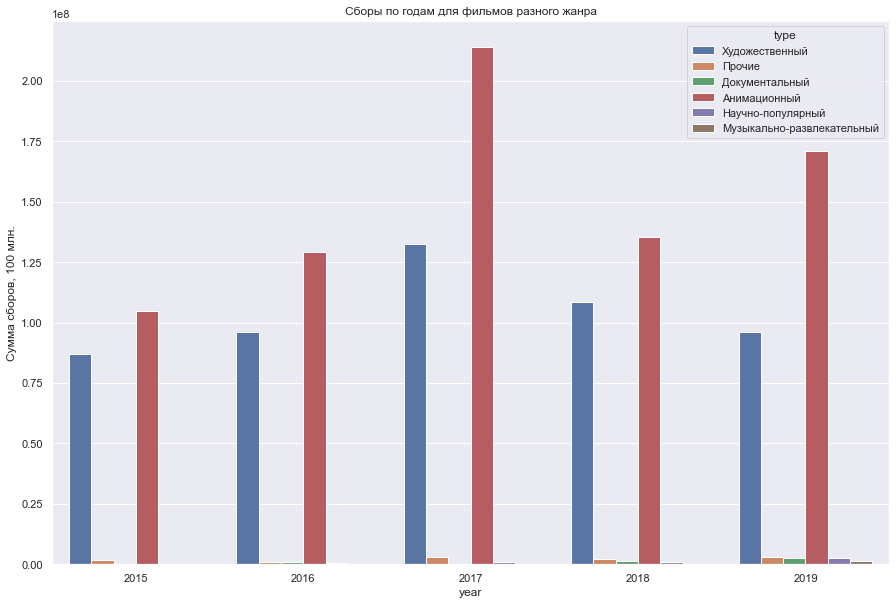

In [69]:
sns.barplot(x="year", y="box_office", data=df.query('year > 2014'), ci=None, hue='type')\
    .set(title='Сборы по годам для фильмов разного жанра', ylabel='Сумма сборов, 100 млн.')
plt.show()

Анимация - безусловный лидер.

### Распределение по странам

Посмотрим группировку по странам.

In [70]:
df.loc[df['year'] > 2014]['production_country'].value_counts()

Россия                                    1255
США                                        846
Франция                                    152
СССР                                       137
Великобритания                             108
                                          ... 
Ирландия - Великобритания - США              1
Германия - США - Франция - Испания           1
США - Великобритания - Япония                1
Аргентина, Испания                           1
Швеция - Германия - Франция - Норвегия       1
Name: production_country, Length: 609, dtype: int64

Наибольшее кол-во фильмов представленно Россией и США. Посмотрим для этих двух стран распределение сборов по годам.

In [71]:
top_country = df.loc[df['year'] > 2014]['production_country'].value_counts().head(2).index

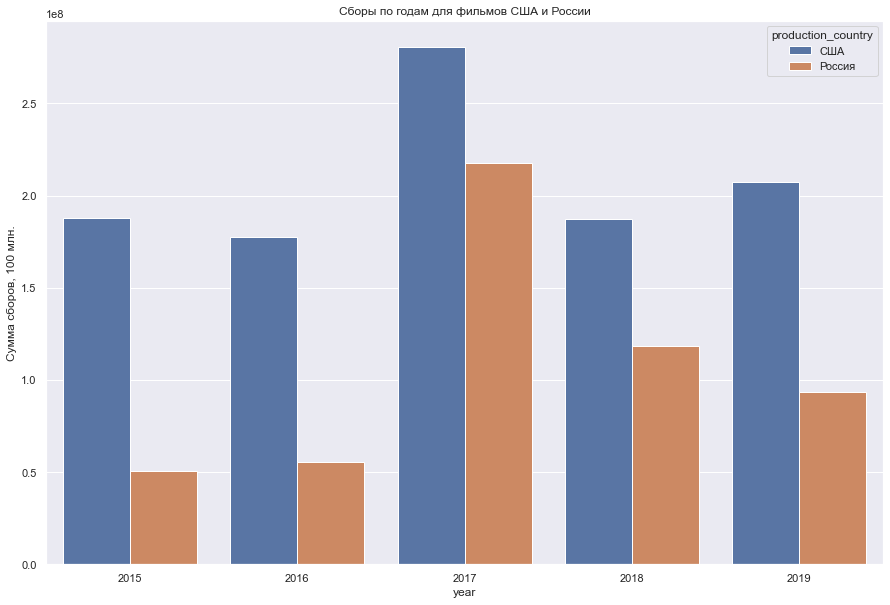

In [72]:
sns.barplot(x="year", 
            y="box_office", 
            data=df.loc[(df['year'] > 2014) & (df['production_country'].isin(top_country))] , 
            ci=None, 
            hue='production_country').set(title='Сборы по годам для фильмов США и России', ylabel='Сумма сборов, 100 млн.')
plt.show()

Несмотря на меньшее количесво, фильмы САШ собирают большую кассу.

Посмотрим на рейтинги фильмов США и России.

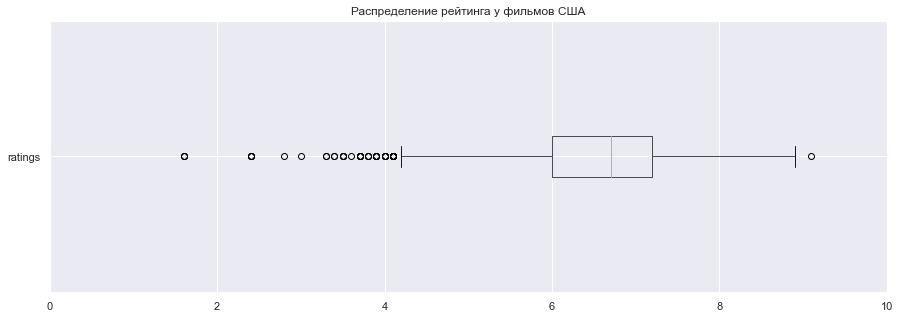

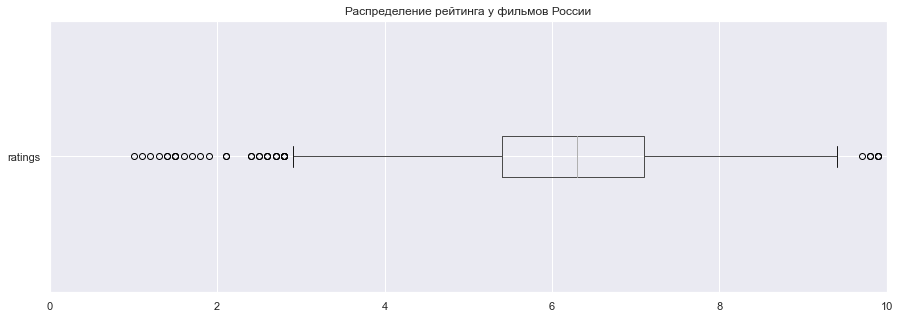

In [73]:
df.loc[df['production_country']=='США'].boxplot(column='ratings', vert=False, figsize=(15,5))\
    .set(title='Распределение рейтинга у фильмов США', xlim=(0,10))
plt.show()
df.loc[df['production_country']=='Россия'].boxplot(column='ratings', vert=False, figsize=(15,5))\
    .set(title='Распределение рейтинга у фильмов России', xlim=(0,10))
plt.show()

Фильмы США, в среднем, имеют более высокие рейтинги. Выборка по США имеет меньший разброс.

### Исследование фильмов с государственной поддержкой.

In [74]:
# создадим df  только с фильмами для которых указана гос.поддержка
dfg = df.query('gov_support_ind == 1')
# общая характиристана нового df
dfg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 1281 to 7473
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  332 non-null    object             
 1   show_start_date        332 non-null    object             
 2   type                   332 non-null    object             
 3   film_studio            332 non-null    object             
 4   production_country     332 non-null    object             
 5   director               332 non-null    object             
 6   producer               330 non-null    object             
 7   age_restriction        332 non-null    object             
 8   refundable_support     332 non-null    float64            
 9   nonrefundable_support  332 non-null    float64            
 10  budget                 332 non-null    float64            
 11  financing_source       332 non-null    object         

In [75]:
dfg.query('budget == 0')['title'].count()

17

Всего 332 записи по таким фильмам. Посмотрим на распределение фильмов с гос.поддержкой по годам. Для 17 записей общий бюджет не указан.

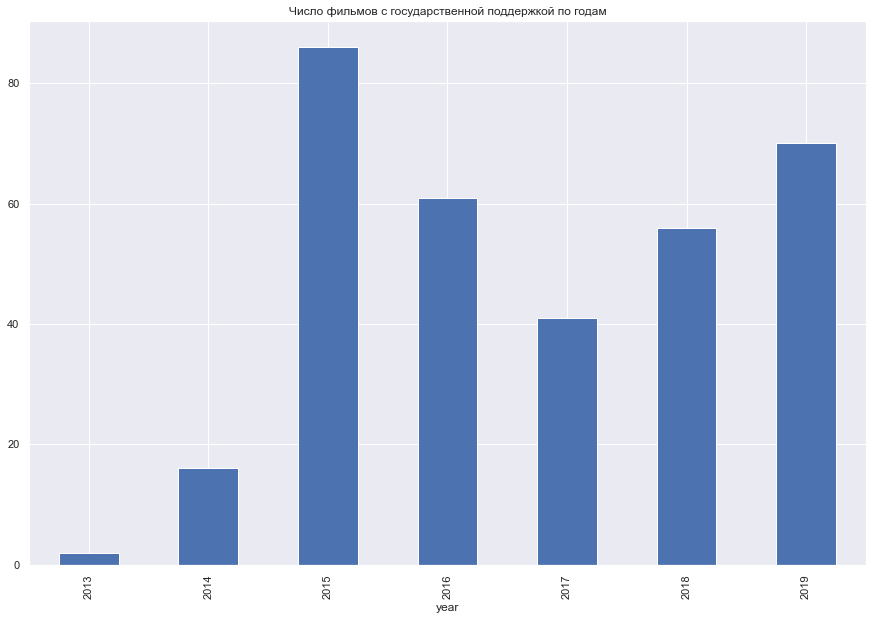

In [76]:
dfg.groupby('year')['title'].count()\
    .plot(kind='bar', grid=True, title='Число фильмов с государственной поддержкой по годам')
plt.show()

Максимальное счисло тахих фильмов было в 2015, менее всего в 2013-2014.

In [77]:
# Добавим столбец с общей суммой поддержки.
dfg['total_support'] = dfg['refundable_support'] + dfg['nonrefundable_support']

In [78]:
# Посмотрим суммы поддержки по годам.
table1 = dfg.pivot_table(index='year', 
                values = ['title', 'refundable_support', 'nonrefundable_support', 'total_support'], 
                aggfunc= {'title':'count', 
                          'refundable_support':'sum', 
                          'nonrefundable_support':'sum', 
                          'total_support':'sum'})
# назначим последовательность столбцов.
col_for_tab1 = ['title', 'nonrefundable_support', 'refundable_support', 'total_support']
table1 = table1.reindex(columns=col_for_tab1)
# добавим долю возвратной поддержки в общей сумме
table1['ref_supp_ration'] = table1['refundable_support'] / table1['total_support'] * 100
# добавим колонку со средней суммой поддержки на 1 фильм
table1['support_per_movie'] = table1['total_support'] / table1['title']
table1.applymap("{0:,.0f}".format)

,title,nonrefundable_support,refundable_support,total_support,ref_supp_ration,support_per_movie
year,,,,,,
2013,2,"134,347,945",0,"134,347,945",0,"67,173,972"
2014,16,"501,002,299","71,000,000","572,002,299",12,"35,750,144"
2015,86,"3,019,088,340","637,153,119","3,656,241,459",17,"42,514,436"
2016,61,"3,381,655,482","921,500,000","4,303,155,482",21,"70,543,532"
2017,41,"2,464,624,781","719,346,881","3,183,971,662",23,"77,657,845"
2018,56,"2,784,969,465","662,000,000","3,446,969,465",19,"61,553,026"
2019,70,"3,976,000,000","928,000,000","4,904,000,000",19,"70,057,143"


Максимальная сумма поддержки, в расчете на 1 фильм, была в 2017. Общая максимальная сумма поддержки в 2019. За последние 4 года доля возвратной поддержки, примерно одинаковая - 19-22%  

In [79]:
# Посмотрим суммы поддержки по типу фильма.
table1 = dfg.pivot_table(index='type', 
                values = ['title', 'refundable_support', 'nonrefundable_support', 'total_support'], 
                aggfunc= {'title':'count', 
                          'refundable_support':'sum', 
                          'nonrefundable_support':'sum', 
                          'total_support':'sum'})
# назначим последовательность столбцов.
col_for_tab1 = ['title', 'nonrefundable_support', 'refundable_support', 'total_support']
table1 = table1.reindex(columns=col_for_tab1)
# добавим долю возвратной поддержки в общей сумме
table1['ref_supp_ration'] = table1['refundable_support'] / table1['total_support'] * 100
# добавим колонку со средней суммой поддержки на 1 фильм
table1['support_per_movie'] = table1['total_support'] / table1['title']
table1.applymap("{0:,.0f}".format)

,title,nonrefundable_support,refundable_support,total_support,ref_supp_ration,support_per_movie
type,,,,,,
Анимационный,31,"1,640,489,465","930,000,000","2,570,489,465",36,"82,919,015"
Документальный,1,"3,000,000",0,"3,000,000",0,"3,000,000"
Художественный,300,"14,618,198,847","3,009,000,000","17,627,198,847",17,"58,757,329"


Здесь мы видим всего 1 документальный фильм и большое кол-во художественных. По общей сумме поддержки лидируют художественные фильмы, но анимационные имеют значительно большую поддержку на 1 фильм, а также большую более чем в 2 раза долю возвратного финансирования.

In [80]:
# Посмотрим суммы поддержки по источнику финансирования.
table1 = dfg.pivot_table(index='financing_source', 
                values = ['title', 'refundable_support', 'nonrefundable_support', 'total_support'], 
                aggfunc= {'title':'count', 
                          'refundable_support':'sum', 
                          'nonrefundable_support':'sum', 
                          'total_support':'sum'})
# назначим последовательность столбцов.
col_for_tab1 = ['title', 'nonrefundable_support', 'refundable_support', 'total_support']
table1 = table1.reindex(columns=col_for_tab1)
# добавим долю возвратной поддержки в общей сумме
table1['ref_supp_ration'] = table1['refundable_support'] / table1['total_support'] * 100
# добавим колонку со средней суммой поддержки на 1 фильм
table1['support_per_movie'] = table1['total_support'] / table1['title']
table1.applymap("{0:,.0f}".format)

,title,nonrefundable_support,refundable_support,total_support,ref_supp_ration,support_per_movie
financing_source,,,,,,
Министерство культуры,164,"4,836,661,000",0,"4,836,661,000",0,"29,491,835"
"Министерство культуры, Фонд кино",22,"859,931,354","325,500,000","1,185,431,354",27,"53,883,243"
Фонд кино,146,"10,565,095,958","3,613,500,000","14,178,595,958",25,"97,113,671"


Общая сумма поддержки Фонда кино больше поддержки МинКульта почти в 4 раза. В среднем, сумма поддержки на 1 фильм больше в 3 раза. Четверть поддержки ФК - это возвратные средства, но и при этом, безвозвратная часть ФК в 2 раза больше МинКульта.

In [81]:
# Посмотрим суммы поддержки по возрастным категориям.
table1 = dfg.pivot_table(index='age_restriction', 
                values = ['title', 'refundable_support', 'nonrefundable_support', 'total_support'], 
                aggfunc= {'title':'count', 
                          'refundable_support':'sum', 
                          'nonrefundable_support':'sum', 
                          'total_support':'sum'})
# назначим последовательность столбцов и строк.
col_for_tab1 = ['title', 'nonrefundable_support', 'refundable_support', 'total_support']
table1 = table1.reindex(columns=col_for_tab1)
table1 = table1.reindex(h_order)
# добавим долю возвратной поддержки в общей сумме
table1['ref_supp_ration'] = table1['refundable_support'] / table1['total_support'] * 100
# добавим колонку со средней суммой поддержки на 1 фильм
table1['support_per_movie'] = table1['total_support'] / table1['title']
table1.applymap("{0:,.0f}".format)

,title,nonrefundable_support,refundable_support,total_support,ref_supp_ration,support_per_movie
age_restriction,,,,,,
«0+» - для любой зрительской аудитории,8,"228,520,000","45,000,000","273,520,000",16,"34,190,000"
«6+» - для детей старше 6 лет,65,"4,087,373,947","1,459,000,000","5,546,373,947",26,"85,328,830"
«12+» - для детей старше 12 лет,106,"6,231,894,165","1,567,500,000","7,799,394,165",20,"73,579,190"
«16+» - для детей старше 16 лет,125,"4,733,900,200","835,153,119","5,569,053,319",15,"44,552,427"
«18+» - запрещено для детей,28,"980,000,000","32,346,881","1,012,346,881",3,"36,155,246"


По общей сумме поддержки выделяются три группы: 6+, 12+, 16+. Лидер по сумме вложений на 1 фильм - 6+, на втором месте 12+.

Для строк, где указана общая сумма бюджета, посмотрим долю поддержки в общем бюджете.

In [82]:
table1 = dfg.query('budget != 0').pivot_table(index='year', 
                                              values = ['title', 'budget', 'total_support'], 
                                              aggfunc= {'title':'count', 
                                                        'budget':'sum', 
                                                        'total_support':'sum'})
# назначим последовательность столбцов и строк.
col_for_tab1 = ['title', 'total_support', 'budget']
table1 = table1.reindex(columns=col_for_tab1)
# добавим долю поддержки в общем бюджете
table1['supp_ration'] = (table1['total_support'] / table1['budget'])* 100
table1.applymap("{0:,.0f}".format)

,title,total_support,budget,supp_ration
year,,,,
2013,2,"134,347,945","255,435,390",53
2014,15,"549,002,299","1,279,484,783",43
2015,80,"3,227,241,459","7,309,669,207",44
2016,58,"3,977,155,482","7,228,942,748",55
2017,39,"3,098,971,662","6,972,172,568",44
2018,52,"3,098,000,000","6,651,694,634",47
2019,69,"4,724,000,000","12,542,866,609",38


При самом высоком уровне поддержки в 2019г, относительное значение самое низкое.

Посмотрим на основные характеристики данных по 'gov_support_rate'

In [83]:
dfg['gov_support_rate'].describe()

count   315.00
mean     51.74
std      17.00
min       4.40
25%      37.35
50%      59.23
75%      65.69
max      78.47
Name: gov_support_rate, dtype: float64

Более половины фильмов получили поддержку от 35 до 66 % от общего бюджета.

Изучим рейтинги фильмов с поддержкой и сравним их с данными по фильмма без поддержки.

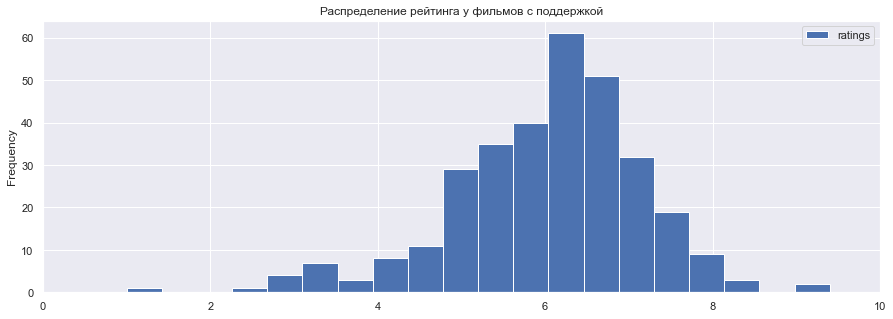

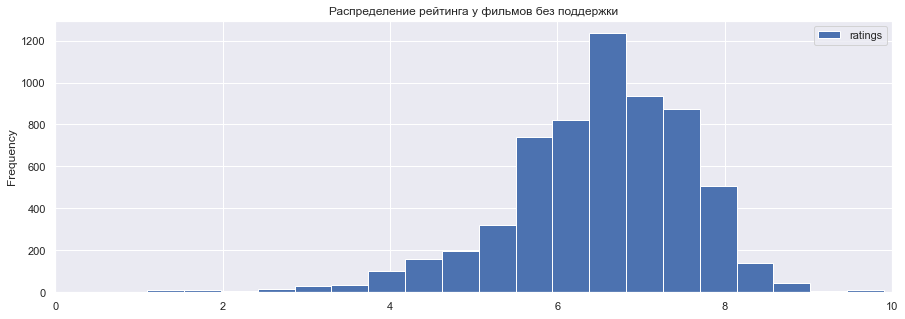

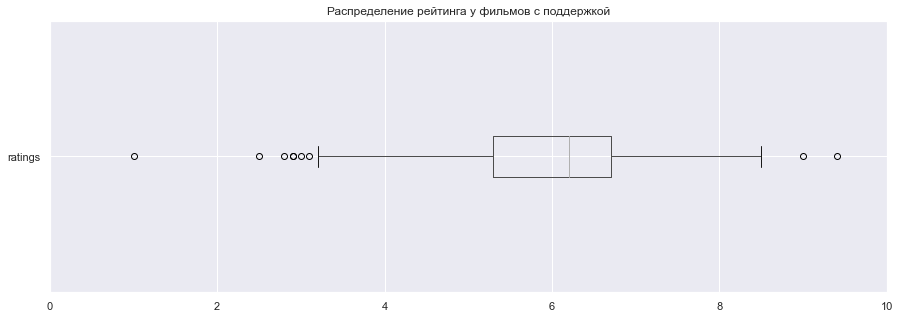

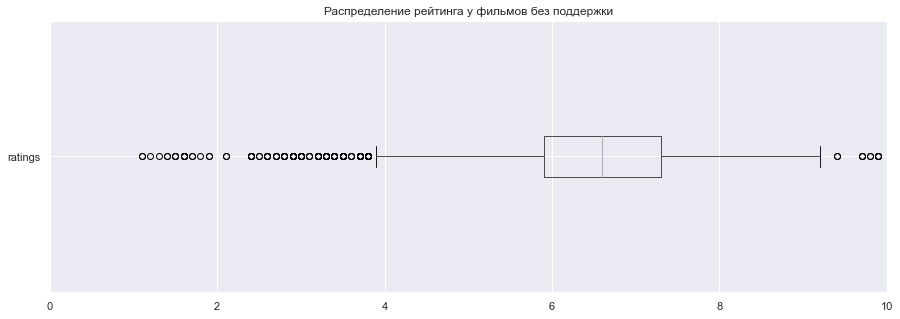

In [84]:
dfg.plot(y='ratings', kind='hist', bins=20, figsize=(15,5), grid=True, xlim=(0,10), 
         title='Распределение рейтинга у фильмов с поддержкой')
plt.show()
df.query('gov_support_ind == 0').plot(y='ratings', kind='hist', bins=20, figsize=(15,5), grid=True, xlim=(0,10),
                                      title='Распределение рейтинга у фильмов без поддержки')
plt.show()
dfg.boxplot(column='ratings', vert=False, figsize=(15,5))\
    .set(title='Распределение рейтинга у фильмов с поддержкой', xlim=(0,10))
plt.show()
df.query('gov_support_ind == 0').boxplot(column='ratings', vert=False, figsize=(15,5))\
    .set(title='Распределение рейтинга у фильмов без поддержки', xlim=(0,10))
plt.show()

Из сравнения видно, что фильмы без поддержки, в среднем, имеют более высокий рейтинг. Но, в выборке фильмов без поддержки представлены данные по всем странам. Сделаем сравнение только по России.

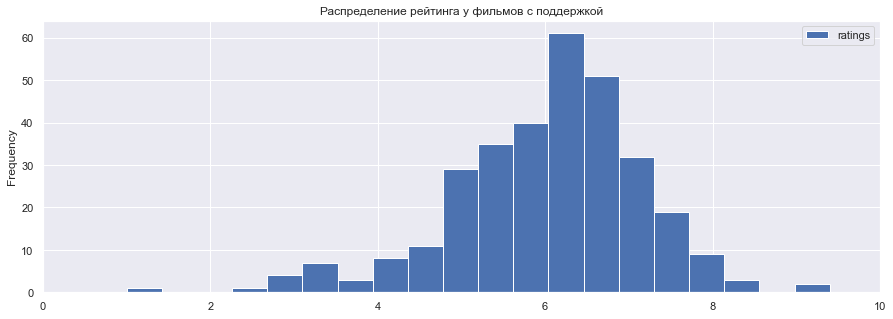

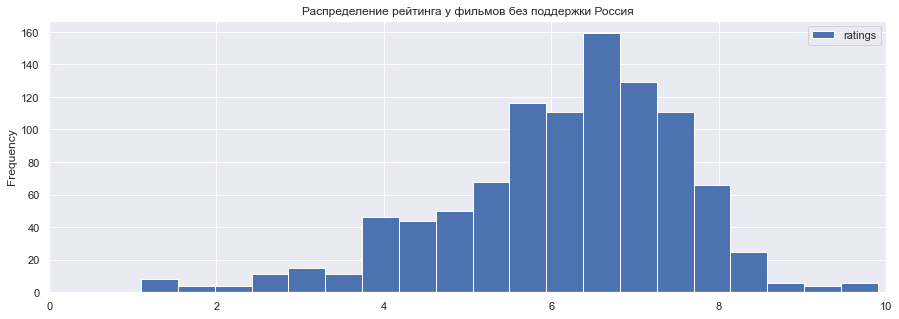

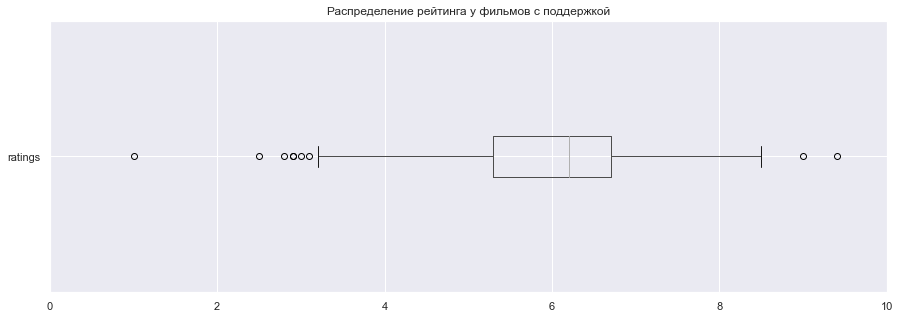

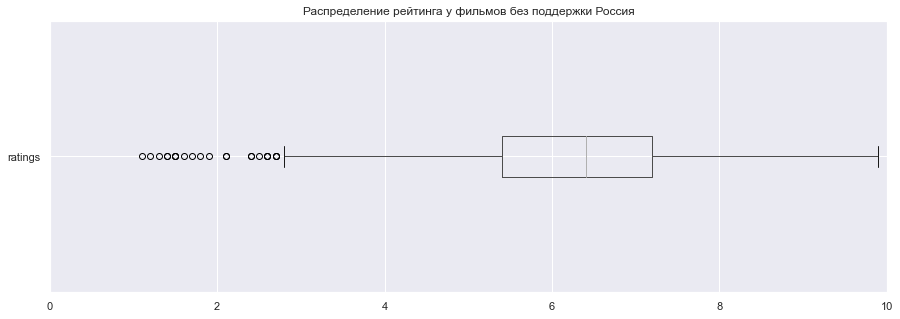

In [85]:
dfg.plot(y='ratings', kind='hist', bins=20, figsize=(15,5), grid=True, xlim=(0,10), 
         title='Распределение рейтинга у фильмов с поддержкой')
plt.show()
df.query('gov_support_ind == 0 and production_country == "Россия"')\
    .plot(y='ratings', kind='hist', bins=20, figsize=(15,5), grid=True, xlim=(0,10),
          title='Распределение рейтинга у фильмов без поддержки Россия')
plt.show()
dfg.boxplot(column='ratings', vert=False, figsize=(15,5))\
    .set(title='Распределение рейтинга у фильмов с поддержкой', xlim=(0,10))
plt.show()
df.query('gov_support_ind == 0 and production_country == "Россия"')\
    .boxplot(column='ratings', vert=False, figsize=(15,5))\
    .set(title='Распределение рейтинга у фильмов без поддержки Россия', xlim=(0,10))
plt.show()

В этом случае разница менее существенна, но фильмы без поддержки, в среднем, имеют более высокий рейтинг, хотя и разброс в оценках выше.

In [86]:
# основные данный по рейтингу для фильмов с поддержкой.
dfg['ratings'].describe()

count   316.00
mean      6.02
std       1.15
min       1.00
25%       5.30
50%       6.20
75%       6.70
max       9.40
Name: ratings, dtype: float64

Половина фильмов имеет рейтинг от 5.3 до 6.7 с медианой 6.2

Для фильмов с поддержной, посмотрим на рейтинги в зависимости от типа фильма.

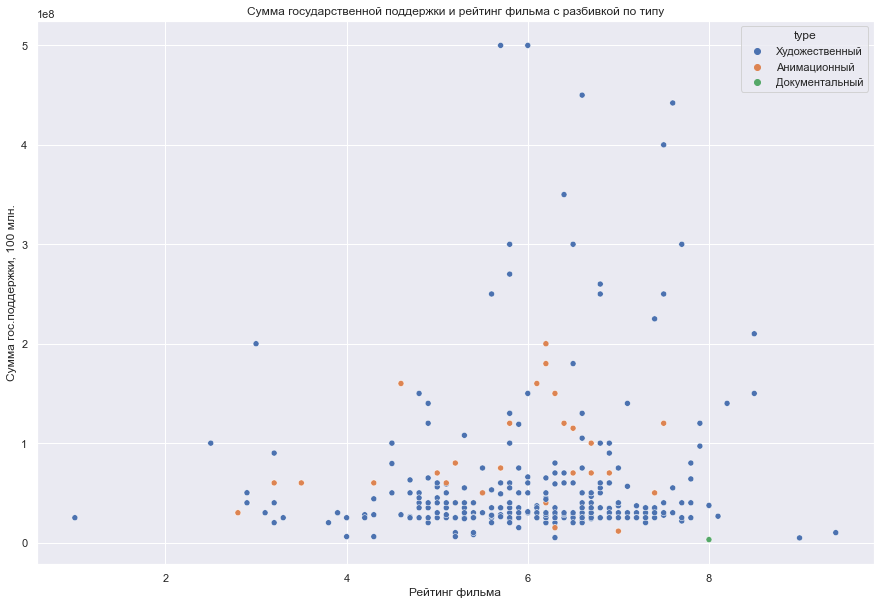

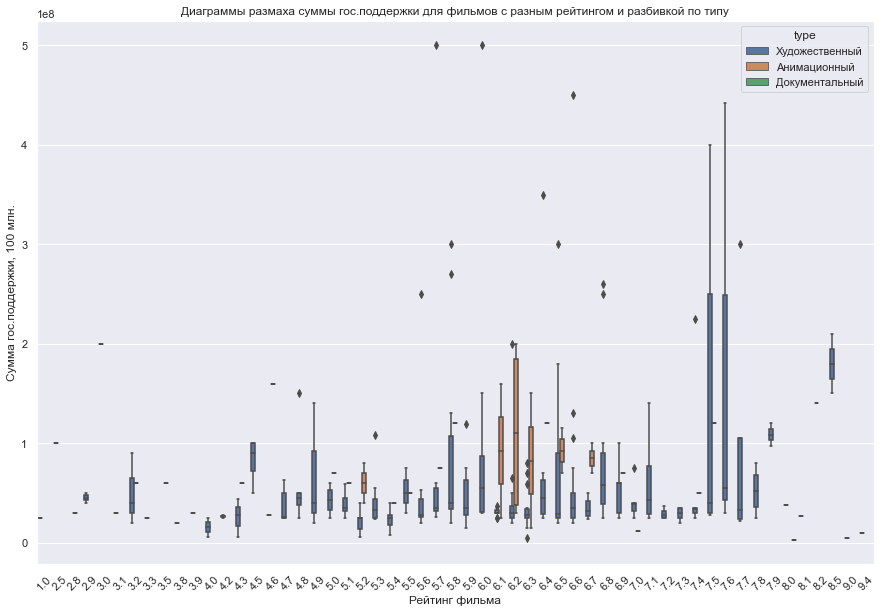

In [87]:
sns.scatterplot(x='ratings', y='total_support', data=dfg, hue='type')\
    .set(title='Сумма государственной поддержки и рейтинг фильма с разбивкой по типу', 
         xlabel='Рейтинг фильма', 
         ylabel='Сумма гос.поддержки, 100 млн.')
plt.show()
sns.boxplot(x='ratings', y='total_support', data=dfg, hue='type')\
    .set(title='Диаграммы размаха суммы гос.поддержки для фильмов с разным рейтингом и разбивкой по типу', 
         xlabel='Рейтинг фильма', 
         ylabel='Сумма гос.поддержки, 100 млн.')
plt.xticks(rotation = 45)
plt.show()

Всего 1 документальный фильм показал хороний результат - 8. Можно говорить, что, как правило, при меньших вложениях, художественные фильмы показали лучший результат. Такой вывод можно сдалать сравнив диаграммы размаха художественного и анимационного фильма для конкретного рейтинга. Так, например видно, при рейтинге в диапазоне 6.1-6.5, анимационные фильмы получали в среднем большую поддержку.

Теперь посмотрим на окупаемость фильмов с поддержкой и среднюю кассу по фильму по годам.

In [88]:
table2 = dfg.query('budget != 0').pivot_table(index='year', 
                                              values = ['title', 'budget', 'box_office'], 
                                              aggfunc= {'title':'count',
                                                        'box_office':'sum',
                                                        'budget':'sum'})
# назначим последовательность столбцов и строк.
col_for_tab1 = ['title', 'budget', 'box_office']
table2 = table2.reindex(columns=col_for_tab1)
table2['profit'] = table2['box_office'] - table2['budget']
table2['profit_rate'] = ((table2['box_office'] - table2['budget']) / table2['budget'])*100
table2['per_movie'] = table2['box_office'] / table2['title']
table2.applymap("{0:,.0f}".format)

,title,budget,box_office,profit,profit_rate,per_movie
year,,,,,,
2013,2,"255,435,390","20,322,385","-235,113,005",-92,"10,161,193"
2014,15,"1,279,484,783","1,007,188,150","-272,296,632",-21,"67,145,877"
2015,80,"7,309,669,207","4,815,747,421","-2,493,921,786",-34,"60,196,843"
2016,58,"7,228,942,748","4,957,724,367","-2,271,218,381",-31,"85,478,006"
2017,39,"6,972,172,568","10,759,515,337","3,787,342,769",54,"275,885,009"
2018,52,"6,651,694,634","9,517,657,281","2,865,962,647",43,"183,031,871"
2019,69,"12,542,866,609","8,262,020,628","-4,280,845,981",-34,"119,739,429"


Самые удачные 2017-2018 года, максимальный средний доход на фильм и полкая окупаемость.

Посмотрим на средний доход с фильма по годам.

In [89]:
table2 = df.query('budget != 0 and gov_support_ind == 0').pivot_table(index='year', 
                                              values = ['title', 'box_office'], 
                                              aggfunc= {'title':'count', 
                                                        'box_office':'sum'})
# назначим последовательность столбцов и строк.
col_for_tab1 = ['title', 'box_office']
table2 = table2.reindex(columns=col_for_tab1)
# добавим срежжний доход на фильм по годам
table2['per_movie'] = table2['box_office'] / table2['title']
table2.applymap("{0:,.0f}".format)

,title,box_office,per_movie
year,,,
2010,984,"2,428,654","2,468"
2011,622,"14,102,765","22,673"
2012,593,"6,955,423","11,729"
2013,627,"9,477,321","15,115"
2014,790,"6,427,529,693","8,136,114"
2015,619,"33,712,079,778","54,462,164"
2016,757,"41,784,591,903","55,197,611"
2017,464,"37,698,631,917","81,247,052"
2018,833,"39,743,244,600","47,710,978"


Тут, за счет большего размера совокупности, картина немного другая, но 2017 год остался в лидерах.

**Вывод.**
<div> Произведён анализ данных согласно задания. Вывода по исслкдовательской части будут вредставленны в п.4 работы.

## Вывод

Основные результаты исследования:
<div>На исследования представлены данные по прокату фильмов в РФ с 2010 по 2019 годы. При этом данные за 2010-2014 имеют проблему(недостаток данных) в части кассовых сборов. Поэтому, анализ финансовых показателей целесообрасно проводить по данным 2015-2019.
<div>C 2015 по 2019 наблюдается рост сборов, что не связано с увеличением фильмов в прокате. Это может быть связано, например, с ростом цен на билеты, или увеличением числа зрителей.
<div>Наибольшим спросом пользуются фильмы категорий 6+ и 12+, меньшим - 18+. Явнный лидер - анимационные фильмы.
<div>Больше всего представлено фильмов пр-ва России и США. Не смотря на большее количество российских фильмов, сборы от проката у фильмов США выше в 1.25-3.5 раз в зависимости от года (2015-2019). Представленный рейтинг говорит о том, что зритель оценивает фильмы пр-ва США, в среднем, выше и оценки имеют меньший разброс.
<div>Для исследования были представленны данные по 332 фильмам с государственной поддержкой. Для 17 фильмов общий бюджет не указан. На 2013-2014гг приходится всго 18 записей от общего количества. Для этой выборки корректно анализировать период с 2015 по 2019гг. Наибольшая поддержка за весь переод оказывалась Фондом кино. Наибольшая поддержка в абсолютном выражении оказывалась художественным фильмам, а в отношении на единицу - анимационным. При этом, анимационные фильмы имеют большую долю возвратной части поддержки. Анализ рейтинга выборки показл, что при меньших вложениях, художественные фильмы показали лучший результат. Однако в целом, рейтинг фильмов с поддержной ниже рейтинга остальных фильмов, хотя и имеет меньший разброс. Три года из пяти были убыточными для фильмов с поддержкой. Из-за отсутствия данных о сборах по выборке фильмов без гос.поддержки, выполнить сравнительный анализ по этому показателю не представляется возможным. 
<div> Более подробные выводы даны в части 3 работы.    